<a href="https://colab.research.google.com/github/ddenebb/hipotesis_testing/blob/main/Tasca_M5_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Testing exercises.
#- Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [88]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 5/Data/Lligues europees UEFA.csv"
df = pd.read_csv(path,encoding="ISO-8859-1",delimiter=";", header=0)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


This dataframe contains information about  ranking UEFA football teams, including their squad name, country, league rank, number of matches played, wins, draws, losses, goals scored, goals against, goal difference, points, points per game, expected goals, expected goals against, expected goal difference, expected goal difference per 90 minutes, last five matches, attendance, top team scorer and goalkeeper.
- Rk: ranking UEFA
- Squad: squad name
- Country: country
- LgRk: league rank
- MP: number of matches played
- W: wins
- D: draws
- L: losses
- GF: goals scored
- GA: goals against
- GD: goal difference
- Pts: points
- Pts/G: points per game
- xG: expected goals
- xGA: expected goals against
- xGD: expected goal difference
- xGD/90: expected goal difference per 90 minutes
- Last 5: last five matches performance (W=win, D=draw, L=loose)
- Attendance: avg attendance, number of people per match
- Top Team Scorer: player name - nember of goals
- Goalkeeper: player name

We.re going to extract the number of goals scored from the 'Top Team Scorer' column, so it can be counted as a numerical variable.

In [90]:
# Extract the number of goals scored from the 'Top Team Scorer' column
df['Goals_TTS'] = df['Top Team Scorer'].str.extract('(\d+)').astype(int)

Select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

The null hypothesis of the test is that the attirbute 'Pts'(Points) comes from a normal distribution. If the p-value is less than the significance level (alpha, commonly 0.05), we reject the null hypothesis and conclude that the data does not come from a normal distribution.
We can perform a test of distribution for the 'Pts' attribute using the shapiro() function from the scipy.stats library. The shapiro() function tests the null hypothesis that the sample came from a normal distribution.

In [91]:
from scipy.stats import shapiro

null_hypothesis = "Points are normally distributed"
alternative_hypothesis = "Points are NOT normally distributed"

# Get the 'Pts' attribute from the dataframe
pts = df['Pts']

# Perform the Shapiro-Wilk test
stat, p = shapiro(pts)
print(stat)
print(p)

# Set alpha
alpha = 0.05

# Compare p_value with alpha
if p < alpha:
    print("Reject the null  hypothesis.")
    print(alternative_hypothesis)    
else:

    print("Fail to reject the null hypothesis.")
    print(null_hypothesis)

0.9720419645309448
0.03465989604592323
Reject the null  hypothesis.
Points are NOT normally distributed


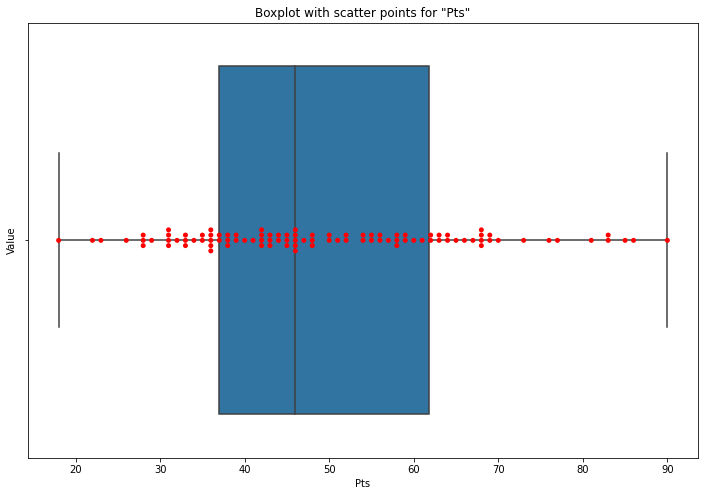

In [92]:
plt.figure(figsize=(12,8))

# Get the 'Pts' attribute from the dataframe
pts = df['Pts']

# Plot the boxplot with scatter points
sns.boxplot(pts)
sns.swarmplot(pts, color='red')

# Add labels and title
plt.xlabel('Pts')
plt.ylabel('Value')
plt.title('Boxplot with scatter points for "Pts"')

# Show the plot
plt.show()


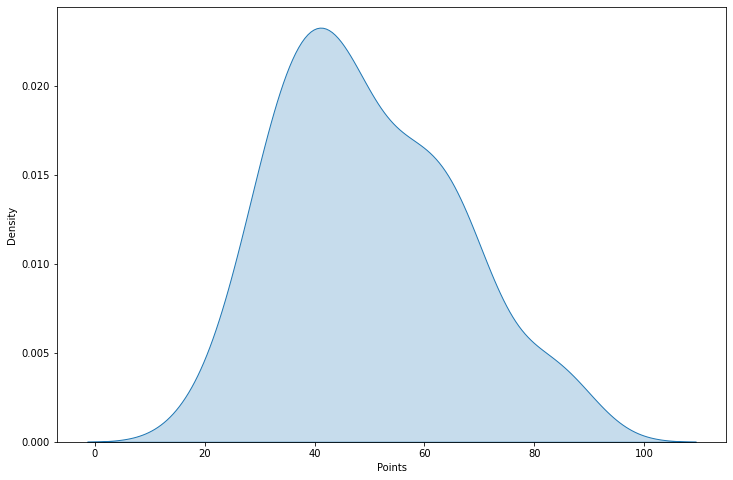

In [93]:
plt.figure(figsize=(12,8))
# Create a kernel density plot
sns.kdeplot(data= df['Pts'], shade=True)

# Add labels and show plot
plt.xlabel('Points')
plt.ylabel('Density')
plt.show()

#- Exercise 2

With the same dataset select two other attributes from the dataset. Calculate the p-values ​​and say whether they reject the null hypothesis by taking an alpha of 5%.

We'll plot a correlation matrix in oder to see which variables are the most likely to be related.

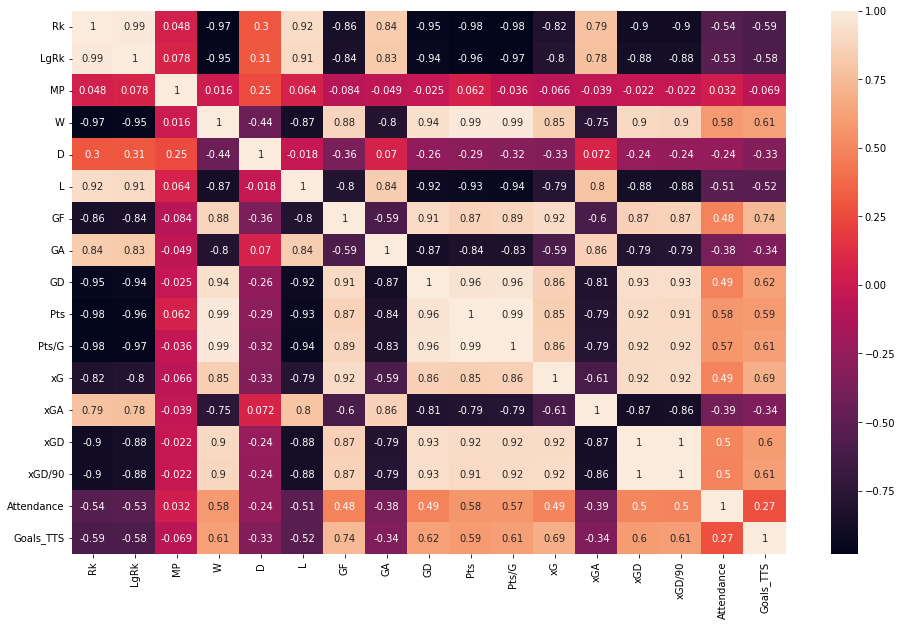

In [94]:
# set figure size
fig, ax = plt.subplots(figsize=(16,10))

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()


Second hypothesis test proposed will be for checking if there is a relationship between goals scored and goals expected:

We will select the "GF" (goals scored column and the "xG" (goals expected) column of the dataset.

Then we define our null hypothesis (H0) and alternative (Ha). In this case, the null hypothesis is that there is a relationship between the average goals scored/expected.

The alternative hypothesis is that there is no relationship between the average goals scored/expected.

We'll conduct the hypothesis testing to check whether there is a difference between the average number of goals using a 0.05 significance level. If there is a significant difference, perform further analysis to find that caused the difference. 

Before doing hypothesis testing, check the related assumptions.

Perform Shapiro test to check if data is normally distributed.

In [95]:
def check_normality(data):
    # Perform the Shapiro-Wilk test
    stat, p = shapiro(data)
    print(stat)
    print(p)

    # Compare the p-value with alpha (0.05)
    alpha = 0.05
    if p <0.05:
      print("Reject null hypothesis >> Data is not normally distributed")
    else:
      print("Fail to reject null hypothesis >> Data is normally distributed")

In [96]:
group1=df['GF']
group2=df['xG']
check_normality(group1)
check_normality(group2)

0.9432637691497803
0.0003564682265277952
Reject null hypothesis >> Data is not normally distributed
0.9401811957359314
0.00023107037122827023
Reject null hypothesis >> Data is not normally distributed


Check if population variances are equal using Levene´s test:
H₀: The variances of the samples are the same.
H₁: The variances of the samples are different.

In [97]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [98]:
check_variance_homogeneity(group1, group2)

p value:0.0290
Reject null hypothesis >> The variances of the samples are different.


Selecting the Proper Test: The normality and variance homogeneity assumptions are not satisfied, therefore we need to use the nonparametric version of ANOVA for unpaired data (the data is collected from different sources).

In [99]:
F, p_value = stats.kruskal(group1, group2)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.563246
Fail to reject null hypothesis


Render data in boxplots to look for outliers.

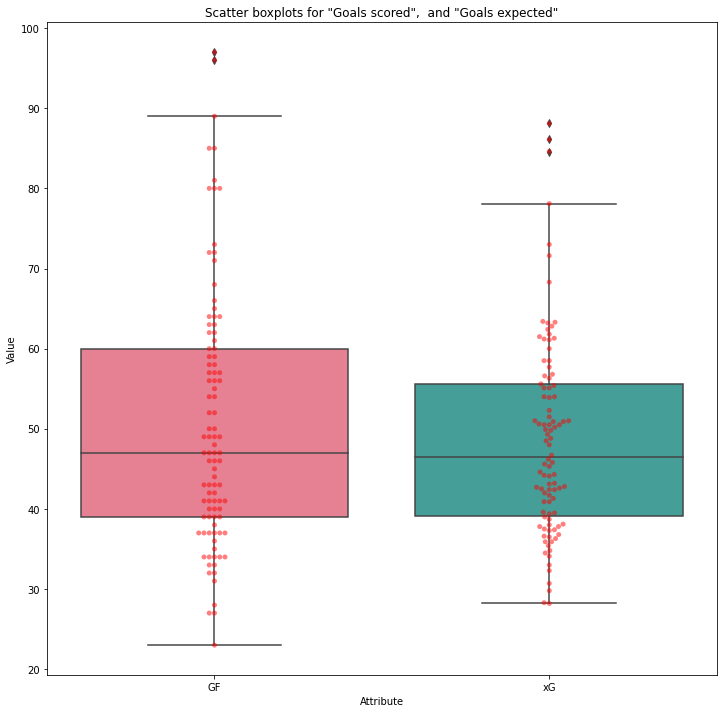

In [100]:
#Set figure size
plt.figure(figsize=(12,12))

# Get the two attributes from the dataframe
gf = df['GF']
xg = df['xG']

# Combine the two attributes into one dataframe
data = pd.DataFrame({'GF': gf, 'xG': xg})

# Plot the scatter boxplots
sns.boxplot(data=data, palette='husl')
sns.swarmplot(data=data, color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('Scatter boxplots for "Goals scored",  and "Goals expected"')

# Show the plot
plt.show()

As data is not Gaussian and there are outliers as seen in the boxplot, the Spearman test will be performed in order to see if goals scored and goals expected are correlated.

In [101]:
from scipy import stats

# select columns
gf = df["GF"]
xg = df["xG"]

# calculate correlation and p-value
corr, p_value = stats.spearmanr(gf, xg)
print(corr)
print(p_value)

# interpret results
alpha = 0.05
if p_value > alpha:
    print("The null hypothesis is not rejected, there is a relationship between goals scored and goals expected (p-value = {:.3f})".format(p_value))
else:
    print("The null hypothesis is rejected, there is no relationship between goals scored and goals expected (p-value = {:.3f})".format(p_value))


0.8992894763816535
2.9833258410291364e-36
The null hypothesis is rejected, there is no relationship between goals scored and goals expected (p-value = 0.000)


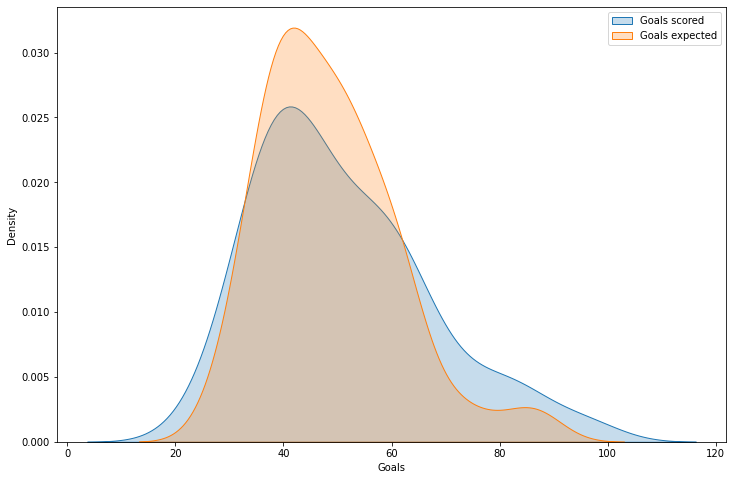

In [102]:
#Define figure size
plt.figure(figsize=(12,8))
# Load your data
gf = df['GF']
xg = df['xG']

# Create kernel density plots for GF and xG
sns.kdeplot(gf, shade=True, label='Goals scored')
sns.kdeplot(xg, shade=True, label='Goals expected')

# Add labels and show plot
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.show()


#- Exercise 3

Continue with the attached dataset and select three attributes. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.
In this case the 3 attributes that will be analyzed are goals scored, matches won and goals scored by top team scorer.

The null hypothesis is that the goals scored, matches won and goals scored by  the team top goal scorer are correlated.

We will compute the correlation between goals scored, matches won and goals scored by top team scorer performing a principal component analysis (PCA) using the scikit-learn library. This will deliver a transformed version of the data (data_PCA) that is represented by the first two principal components. The transformed data will be gaussian checked and plotted to see if there are outliers. Based in that we´ll decide which test will be used to check correlation between the variables and decide if the null hypothesis is rejected or not.

Finally, we will create a scatter plot to visualize the relationship between goals scored, matches won, and goals scored by the team top goal scorer.

In [103]:
def check_variance_homogeneity(group1, group2, group3):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [104]:
group1=df['GF']
group2=df['W']
group3=df['Goals_TTS']
check_normality(group1)
check_normality(group2)
check_normality(group3)

check_variance_homogeneity(group1, group2, group3)

0.9432637691497803
0.0003564682265277952
Reject null hypothesis >> Data is not normally distributed
0.9653530120849609
0.010962688364088535
Reject null hypothesis >> Data is not normally distributed
0.8832738995552063
3.127801448954415e-07
Reject null hypothesis >> Data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


Selecting the Proper Test: The normality and variance homogeneity assumptions are not satisfied, therefore we need again to use the nonparametric version of ANOVA for unpaired data (the data is collected from different sources).

In [105]:
F, p_value = stats.kruskal(group1, group2, group3)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


<Figure size 1728x1440 with 0 Axes>

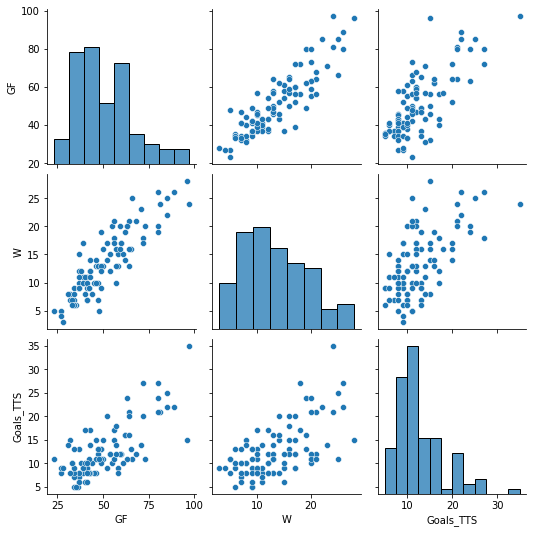

In [106]:
#Define figure size
plt.figure(figsize=(24,20))
# Select the relevant columns
data = df[['GF', 'W', 'Goals_TTS']]

# Create the scatter plot matrix
sns.pairplot(data)

# Show the plot
plt.show()


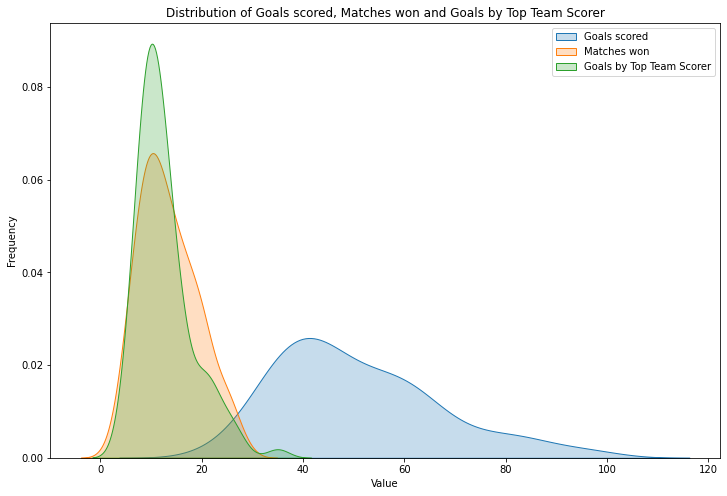

In [107]:
fig, ax = plt.subplots(figsize=(12,8))
# Load the data into three separate variables
x = df['GF']
y = df['W']
z = df['Goals_TTS']

# Create kernel density plots for GF and xG
sns.kdeplot(x, shade=True, label='Goals scored')
sns.kdeplot(y, shade=True, label='Matches won')
sns.kdeplot(z, shade=True, label='Goals by Top Team Scorer')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Goals scored, Matches won and Goals by Top Team Scorer')
plt.legend()

# Show the plot
plt.show()


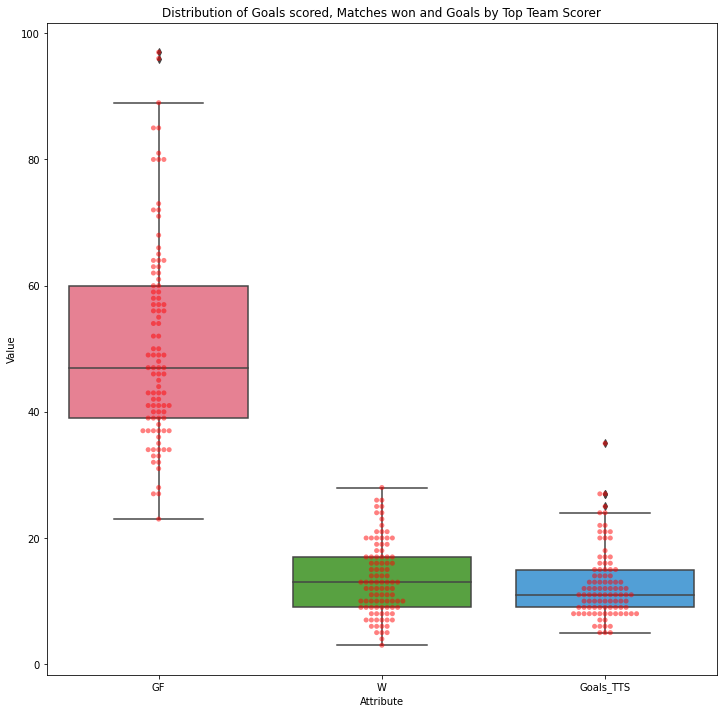

In [108]:
fig, ax = plt.subplots(figsize=(12,12))

# Get the three attributes from the dataframe
gf = df['GF']
w = df['W']
gtts= df['Goals_TTS']

# Combine the three attributes into one dataframe
data = pd.DataFrame({'GF': gf, 'W': w, 'Goals_TTS': gtts})

# Plot the scatter boxplots
sns.boxplot(data=data, palette='husl')
sns.swarmplot(data=data, color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('Distribution of Goals scored, Matches won and Goals by Top Team Scorer')

# Show the plot
plt.show()
